In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50


In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2021-10-09 01:30:59--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  12.1MB/s    in 25s     

2021-10-09 01:31:24 (9.53 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [ ]:
!unzip -q tiny-imagenet-200.zip && ls tiny-imagenet-200

test  train  val  wnids.txt  words.txt


In [ ]:
def mapDirectoryToInt():
    ID_DICT = {}
    PATH = 'tiny-imagenet-200/wnids.txt'
    FILEOPEN = open(PATH,'r')
    for i, folder in enumerate(FILEOPEN):
        ID_DICT[folder.replace('\n','')]=i
    return ID_DICT

In [ ]:
print(mapDirectoryToInt())

{'n02124075': 0, 'n04067472': 1, 'n04540053': 2, 'n04099969': 3, 'n07749582': 4, 'n01641577': 5, 'n02802426': 6, 'n09246464': 7, 'n07920052': 8, 'n03970156': 9, 'n03891332': 10, 'n02106662': 11, 'n03201208': 12, 'n02279972': 13, 'n02132136': 14, 'n04146614': 15, 'n07873807': 16, 'n02364673': 17, 'n04507155': 18, 'n03854065': 19, 'n03838899': 20, 'n03733131': 21, 'n01443537': 22, 'n07875152': 23, 'n03544143': 24, 'n09428293': 25, 'n03085013': 26, 'n02437312': 27, 'n07614500': 28, 'n03804744': 29, 'n04265275': 30, 'n02963159': 31, 'n02486410': 32, 'n01944390': 33, 'n09256479': 34, 'n02058221': 35, 'n04275548': 36, 'n02321529': 37, 'n02769748': 38, 'n02099712': 39, 'n07695742': 40, 'n02056570': 41, 'n02281406': 42, 'n01774750': 43, 'n02509815': 44, 'n03983396': 45, 'n07753592': 46, 'n04254777': 47, 'n02233338': 48, 'n04008634': 49, 'n02823428': 50, 'n02236044': 51, 'n03393912': 52, 'n07583066': 53, 'n04074963': 54, 'n01629819': 55, 'n09332890': 56, 'n02481823': 57, 'n03902125': 58, 'n0340

In [ ]:
def getImage(folderName=None):
    DATASET_PATH = 'tiny-imagenet-200/'+folderName+'/'
    directories = os.listdir(DATASET_PATH)
    ONE_HOT_ENCODED = np.eye(len(directories))
    MAP_DIC = mapDirectoryToInt()
    TRAIN_IMAGES = []
    TRAIN_LABELS = []
    CLASS = None
    for directory in directories:
        path = DATASET_PATH+directory+'/'
        files = os.listdir(path)
        if files[0].endswith('.txt'):
            CLASS = files[0]
        else:
            CLASS = files[1]
        for file in files:
            if file.endswith('.txt'):
                continue
            IMG_FOLDER_PATH = path+file+'/'
            IMAGES = os.listdir(IMG_FOLDER_PATH)
            for IMAGE in IMAGES:
                IMG_PATH = IMG_FOLDER_PATH+IMAGE
                img = cv2.imread(IMG_PATH)
                if len(img.shape)< 3:
                    continue
                #img = np.reshape(img,[64,64,3])
                TRAIN_IMAGES.append(img)
                TRAIN_LABELS.append((np.reshape(ONE_HOT_ENCODED[MAP_DIC[CLASS.replace('_boxes.txt','')]], [200])))
    return np.array(TRAIN_IMAGES), np.array(TRAIN_LABELS)
            

In [ ]:
def loadValidationData(folderName=None):
    DATASET_PATH = 'tiny-imagenet-200/'
    DATASET_FILE_PATH = 'tiny-imagenet-200/'+folderName+'/val_annotations.txt'
    ONE_HOT_ENCODED = np.eye(200)
    MAP_DIC = mapDirectoryToInt()
    file = open(DATASET_FILE_PATH)
    TEST = []
    TEST_LABELS = []
    cnt = 0
    for line in file:
        image, class_id = line.split('\t')[:2]
        IMG_PATH = DATASET_PATH+folderName+'/images/'+image
        img = cv2.imread(IMG_PATH)
        if len(img.shape) <3:
            continue
        TEST.append(img)
        TEST_LABELS.append((np.reshape(ONE_HOT_ENCODED[MAP_DIC[class_id]], [200])))
    return np.array(TEST), np.array(TEST_LABELS)

In [ ]:
from tensorflow import keras
TEST_IMAGES, TEST_LABELS = loadValidationData('val')
TEST_IMAGES = keras.applications.resnet50.preprocess_input(TEST_IMAGES)

In [ ]:
print(TEST_IMAGES.shape)
print(TEST_LABELS.shape)

(10000, 64, 64, 3)
(10000, 200)


In [ ]:
TRAIN_IMAGES, TRAIN_LABELS = getImage('train')

In [ ]:
print(TRAIN_IMAGES.shape)
print(TRAIN_LABELS.shape)

(100000, 64, 64, 3)
(100000, 200)


In [ ]:

TRAIN_IMAGES =  keras.applications.resnet50.preprocess_input(TRAIN_IMAGES)


In [ ]:
TEST_IMAGES.shape

(10000, 64, 64, 3)

In [ ]:
path = 'tiny-imagenet-200/'

In [ ]:
import tensorflow.keras as K

In [ ]:
input_shape = K.Input(shape=(64,64,3))

In [ ]:

resModel = ResNet50(include_top=False,input_tensor=input_shape)
#model.summary()

In [ ]:
import tensorflow as tf 
model = K.models.Sequential()
model.add(resModel)
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dropout(0.5))
model.add(K.layers.Dense(200, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy',
                  optimizer=K.optimizers.Adam(learning_rate=0.0001),
                  metrics=['accuracy'])

In [ ]:
TRAIN_IMAGES.shape, TRAIN_LABELS.shape, TEST_IMAGES.shape, TEST_LABELS.shape

((100000, 64, 64, 3), (100000, 200), (10000, 64, 64, 3), (10000, 200))

In [ ]:
history = model.fit(TRAIN_IMAGES, TRAIN_LABELS, batch_size=32,  epochs=50, verbose=1,
                        validation_data=(TEST_IMAGES,TEST_LABELS))

Epoch 1/50
3125/3125 [==============================] - 143s 44ms/step - loss: 3.9657 - accuracy: 0.2218 - val_loss: 2.8548 - val_accuracy: 0.3858
Epoch 2/50
3125/3125 [==============================] - 137s 44ms/step - loss: 2.7465 - accuracy: 0.3808 - val_loss: 2.5249 - val_accuracy: 0.4382
Epoch 3/50
3125/3125 [==============================] - 137s 44ms/step - loss: 2.2864 - accuracy: 0.4561 - val_loss: 2.3416 - val_accuracy: 0.4653
Epoch 4/50
3125/3125 [==============================] - 137s 44ms/step - loss: 1.9422 - accuracy: 0.5221 - val_loss: 2.2267 - val_accuracy: 0.4845
Epoch 5/50
3125/3125 [==============================] - 137s 44ms/step - loss: 1.6537 - accuracy: 0.5771 - val_loss: 2.3226 - val_accuracy: 0.4939
Epoch 6/50
3125/3125 [==============================] - 137s 44ms/step - loss: 1.3855 - accuracy: 0.6334 - val_loss: 2.3653 - val_accuracy: 0.4952
Epoch 7/50
3125/3125 [==============================] - 137s 44ms/step - loss: 1.1437 - accuracy: 0.6888 - val_loss: 2

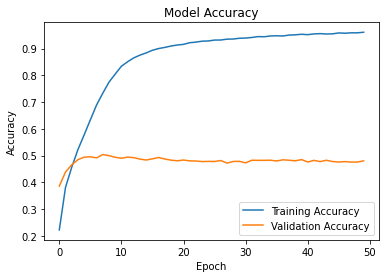

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Model Accuracy")
plt.show()

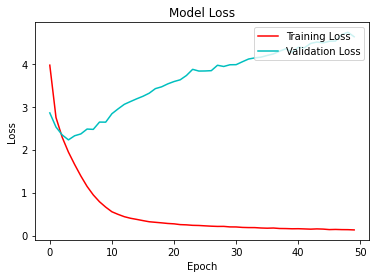

In [ ]:
plt.plot(history.history['loss'],'r', label='Training Loss')
plt.plot(history.history['val_loss'],'c', label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.savefig('model_1_loss.png',format='png')
plt.show()

In [ ]:
print('Training accuracy: ', np.around(history.history['accuracy'][49]*100, decimals=2))
print('Validaiton accuracy: ', np.around(history.history['val_accuracy'][49]*100, decimals=2))

Training accuracy:  96.1
Validaiton accuracy:  48.01


In [ ]:
prediction = model.evaluate(TEST_IMAGES,TEST_LABELS)
print("Testing Accuracy: ", np.around(prediction[1]*100, decimals=2))
print("Testing Loss: ", np.around(prediction[0],decimals=2))

313/313 [==============================] - 5s 15ms/step - loss: 4.6275 - accuracy: 0.4801
Testing Accuracy:  48.01
Testing Loss:  4.63
